In [1]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
%run "../functions/get_data.ipynb"
%run "../functions/trimmer.ipynb"
%run "../functions/training.ipynb"

In [2]:
SELECTED_FILE_P = 'P_5'
SELECTED_FILE_S = 'S_5'

In [ ]:
folder_path = '../data/initial_data/dance_inst_clean/'
file_list = get_file_list(folder_path)

file_dict = {file.split('/')[-1][:-4]: index for index, file in enumerate(file_list)}

In [4]:
X, Y = get_data(file_list)

In [5]:
seed = 1

[37 43 12  8  9 11  5 15  0 16]
[ 1  6 25 50 20 18 11 28 29 14]


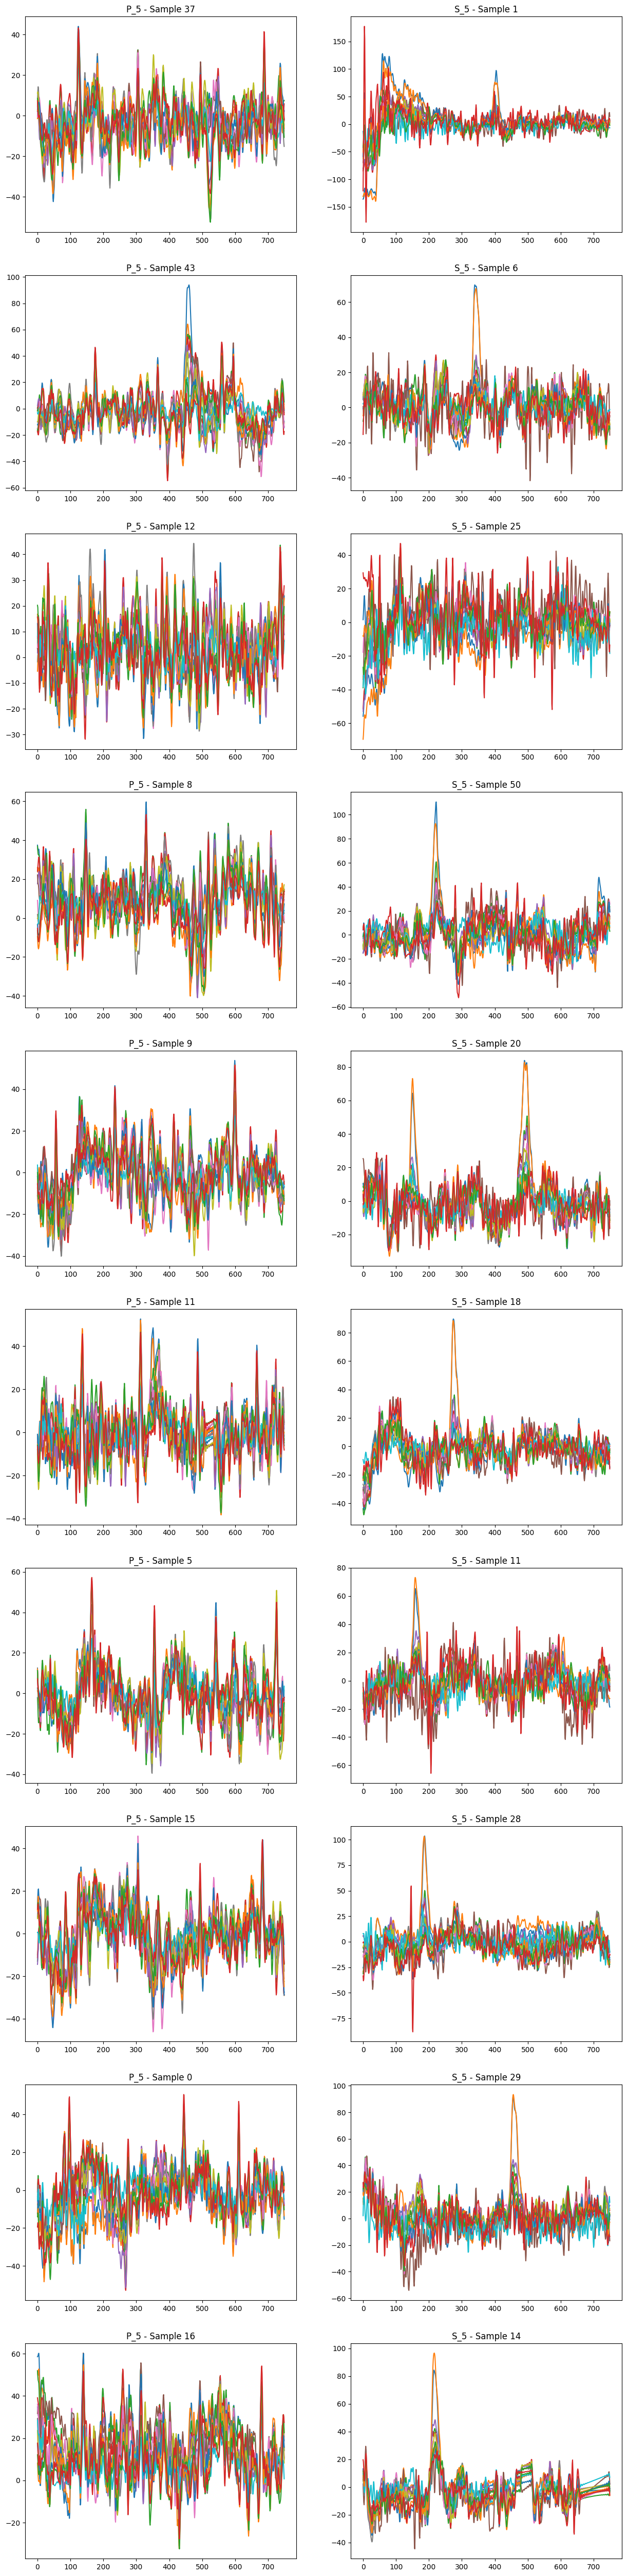

In [6]:
np.random.seed(seed)

P_index = file_dict[SELECTED_FILE_P]
S_index = file_dict[SELECTED_FILE_S]

# select 10 random samples from the selected P and S files
P_samples = np.random.choice(X[P_index].shape[0], 10)
S_samples = np.random.choice(X[S_index].shape[0], 10)

print(P_samples)
print(S_samples)

num_graphs = len(P_samples) + len(S_samples)  # Compute the number of subplots
num_rows = (num_graphs + 1) // 2  # Compute the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.subplots_adjust(top=1.1)

# Initialize counters for P and S samples
p_counter = 0
s_counter = 0

# plot the samples one by one (alternating between P and S samples)
for i in range(num_graphs):
    if i % 2 == 0 and p_counter < len(P_samples):
        plot_sample(X[P_index], P_samples[p_counter], axes[i // 2, i % 2], title=SELECTED_FILE_P)
        p_counter += 1
    elif s_counter < len(S_samples):
        plot_sample(X[S_index], S_samples[s_counter], axes[i // 2, i % 2], title=SELECTED_FILE_S)
        s_counter += 1

# Hide the unused subplots
for j in range(i + 1, num_rows * 2):
    axes[j // 2, j % 2].axis('off')

seed += 1
